# RANDOM FOREST (RANDOM DECISION TREE)

**What is random forest?**

Random forest or the random decision tree is a machine learning algorithm that works in a similar way to a decision tree by constructing multiple decisions trees hence the name randon forest. A random forest is a type of supervised learning.

In a simple to understand terms(layman's way), imagine you want to buy a new PC but you are not sure which one to buy so you decide to ask a bunch of your friends for thier recommendations. After collecting all the recommended PCs, you present the list to each of your friends and as for thier vote on which PC to buy. After all of your friends voted, you have the results and can now decide which PC to buy. The PC you decide to buy is the one with the most votes(recommendations).

Think of each of your friends as an individual decision tree that makes a decision and think of all your friends as a group of trees or a random forest. This is basically how a random forest works, its a bunch of decision trees that make a decision and the most voted decision is the final output of the random forest.

**basically this is how a decisio tree works**

1. select a random sample for the dataset
2. Make a decision tree for each sample and gets a prediction for each tree.
3. Make a vote for each prediction
4. Select the prediction with the most votes and output that as the final decision of the random forest algorithm.

We will discuss more on why the decision trees as not same, since this would mean asking the same friend for a decision, the output or decision will always be the same. Due to this we must make sure each tree is a unique decision tree. The trees are all unique since we select a random sample each time t when making a decision tree in out random forest. Thi is the main reason why we select a sample and from each we make a tree to ensure that each tree is unqiue.


**Is the random forest algorithm used for classification and regression problems?**

Yes, the decision tree is a classification algorithm. It's used to solve various classification problems such as classifying an image and so on. As we'll see later on in the text how a decision tree can be used to classify the iris dataset, its also used for regression problems.

**Other Uses Of Random Forest**

1. Object detection
2. ETM (used in space satelites)



**Terminologies we need to know**

1. Entropy
 > This is basically the degree of randomness of the dataset, example a bowl of fruits containig a mixture of oranges and applse along with some lemons has a high degree of entropy while another bowl containing oranges only has a low entropy`(measuere of randomness)`.
 
2. Information gain
 > This is the amount or degree of randomness removed form our dataset after splitting the dataset. Taking the bowl containing oranges, apples and lemons, when we split the fruits and obtain two bowls one cantaining only apples while the other containes oranges and lemons, the entropy has reduced. The measure the amount of reduced in randomness is what we call `information gain`.
 >> information gian = E1 - E2
 
 >>**Where:**\
 E1 is the entropy before splitting\
 E2 is the entropy after splitting
 
3. Leaf node
> This is the last node containing a final decision. It has no other branches.
 
4. Decision node
 > These are the other nodes below the root node that have two or more branches.
 
5. Root node
 > This is basically the top most node of a decision tree.
 

**How are the splits made?**

Splititing of the original dataset is done in such a way that the split that will give the highest information gain is selected. Taking a bowl of fruits you want to make a decision tree to classify the fruits. You can first decise to make the first split basing on the colors of a fruit or the diameter of the fruits. But which is the best feature to make the split on? We can determine the best split mathematically by calculating the entropy then the information gained. The split that will provide us with the largest information gain it the one we will firts split or dataset on. In this case lets say that color of the fruits gives the highest information gain.

Lets say the fruits are mostly green and yellow in color of course different fruits may have different variations of the colors(green and yellow). So make we have made the first split and have two bowls of fruits(first bowl containing yellow fruits and second bowl containing green fruits). Now we can make furtheer branches to our decision tree by considering other features, lest say we have the weights and the diameter of the fruits. The weights of the fruits gives a high information gain compared to when we split the dataset basing on the diameter of the fruits so the second decision node in our decision tree will be the weight of the fruits. We'll continue to do this procedure untill we no more features to split our data on, at this point we only have leaf nodes.

The aim of this process is to reduce the randomness or uncertainty in the dataset with each split untill a point when the branches or leaf nodes have no uncertainty.



### What is bagging

Imagine we have a decision tree with $ n $ number of unique trees, each tree gives a result of its decision, to find the overall decision of all the trees which will be the final output or classification result of the random forest, we need to find the average of the votes. The highest vote will be the output of the random forest. This can be done by finding the average of the decision of each trees(in case of numeric data) consider the image below, the majority of the votes is blue so the final output of the random forest is blue, you guessed it right :)

![](images/decisionTreeRandomforest.png)

### Let's do some machine learning :)

**Problem statement**

Using the iris dataset we'll try to create a machine learning algorithm(random forest) to classify each flower given some set of feature about the flower.

## Standard imports

In [1]:
import pandas as pd
import numpy as np

## Load dataset

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
# Uncomment out the code below to see more info of the iris dataset
# iris.DESCR
# print(iris)

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['target'] = iris.target
# iris.target_names
# iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
pd.isna(df).sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
target               0
dtype: int64

You can see that our dataset has no missing values, yehh!!

## Selecting input and output variables

In [8]:
X_cols = df[['sepal length (cm)', 'sepal width (cm)','petal length (cm)', 'petal width (cm)']]
y_cols = df['target']

## Let's split our dataset into training and testing sets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_cols, y_cols, train_size=0.7, random_state=5)

## Creating and fitting(training) Random Forest Model

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
ranfor = RandomForestClassifier(n_jobs=2, random_state=0)

In [13]:
ranfor.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

## Let's make a prediction

In [14]:
ranfor.predict([[5.1, 3.5, 1.4, 0.2]])

array([0])

## Taking Votes

`ranfor.predict_proba()` what this does is that, it shows us all the votes of each decision tree in the 'forest'. From the above output, its clear that there were two (2) votes for 0 (setosa) and one vote for versicolor. Hence the final vote is setosa since most of the decision trees voted in it's favour. That's why we got setosa(0) as the output.

In [15]:
ranfor.predict_proba([[5.1, 3.5, 1.4, 0.2]])

array([[1., 0., 0.]])

## Returning The Names

In [16]:
predictions = ranfor.predict(X_test)

In [17]:
pred = iris.target_names[predictions]
pred

array(['versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor'],
      dtype='<U10')

## Visualization Of The Model Accuracy

Lets use a heat map

In [18]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [19]:
cm = confusion_matrix(y_test, predictions)

Text(0.5, 42.0, 'Prediction')

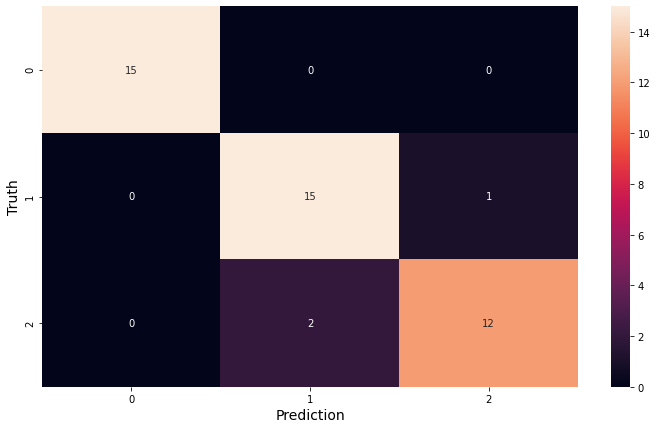

In [20]:
plt.figure(figsize=(12, 7))
sn.heatmap(cm, annot=True)
plt.ylabel('Truth', fontsize=14)
plt.xlabel('Prediction', fontsize=14)

## Calculating the accuracy of the model

In [21]:
from sklearn import metrics

In [22]:
metrics.accuracy_score(y_test, predictions)

0.9333333333333333

## Finding important features of the decision trees

In [23]:
feature_imp = pd.Series(ranfor.feature_importances_ , index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.477194
petal length (cm)    0.393034
sepal length (cm)    0.091609
sepal width (cm)     0.038163
dtype: float64

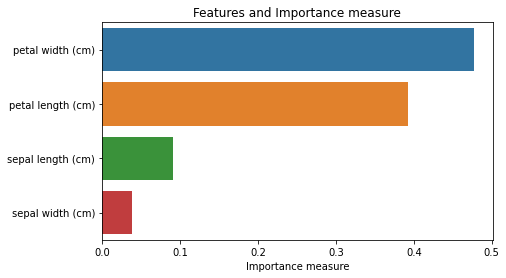

In [24]:
%matplotlib inline


plt.figure(figsize=(7, 4))
sn.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Features and Importance measure', fontsize=12)
plt.xlabel('Importance measure')
plt.show()

From the above diagram its clear that the sepal with ha very little importance in the random forest we created. We can remove the setap width from the features and run the code again checking if the performace(accuracy) has incresed or not. comment out the block of code below to measure that.

In [25]:
X_cols = df[['sepal length (cm)','petal length (cm)', 'petal width (cm)']]
y_cols = df['target']

# split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_cols, y_cols, train_size=0.7, random_state=5)

# create the instance of the random forest classifier
ranfor = RandomForestClassifier(n_jobs=2, random_state=0)

# train the model
ranfor.fit(X_train, y_train)

predictions = ranfor.predict(X_test)

metrics.accuracy_score(y_test, predictions)

0.9555555555555556

As you can observe, there is an increase in the model accuracy.

## Advantages and disadvantages of a random forest

Now that we have an good enough understanding of a random forest, lets see what are some of the pros and cons of using one.

1. Advantages

    * No overfitting, this is as a result of the final decision being the average of all the other decisions in the random forest. This helps to remove baises from individual decision trees.
    * High accuracy, since the final decision is made the average of all the decisions from the trees in the decision tree.
    * Less training time
    + Estimates missing values
    - The algorithm can be used for both regression and classification problems.
    
    
2. Disadvantages

    + It is timu consuming in making predictions since it takes time to obtain the predictions from all the individual trees and the perform voting on these results to give a final output.
    - Its difficult to interprete a random forest compared to a single decision tree since, there are multiple trees involved and each tree has been constructed on a unique set of features.

## Conclusion

Congratulations! for making it this far.

```python
if this_helpful:
    print('subscribe to my youtube channel, link below')
```
[Subscribe to my youtube channel](www.youtube.com/c/CodeWithPrince)


Prince Krampah signing out :)